# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [6]:
#1
sales[sales['sales'] > 10]

#2
sales[sales['year'] == 2018]

#3
sales[(sales['sales'] > 13) & (sales['year'] == 2018)]

#4
sales[~((sales['sales'] > 13) & (sales['year'] == 2018))]

#5
sales[sales['sales'] / 3 > 3]

#6
sales[sales['employee'] > 'J']


,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
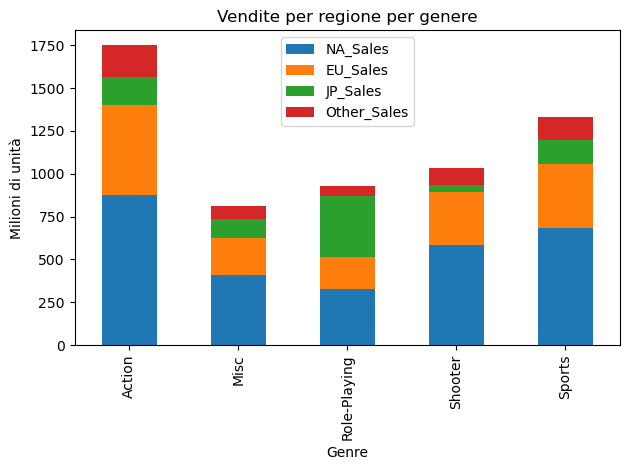


In [7]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Numero totale di videogiochi nel dataset: 16598
Top 10 generi più popolari:
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: count, dtype: int64


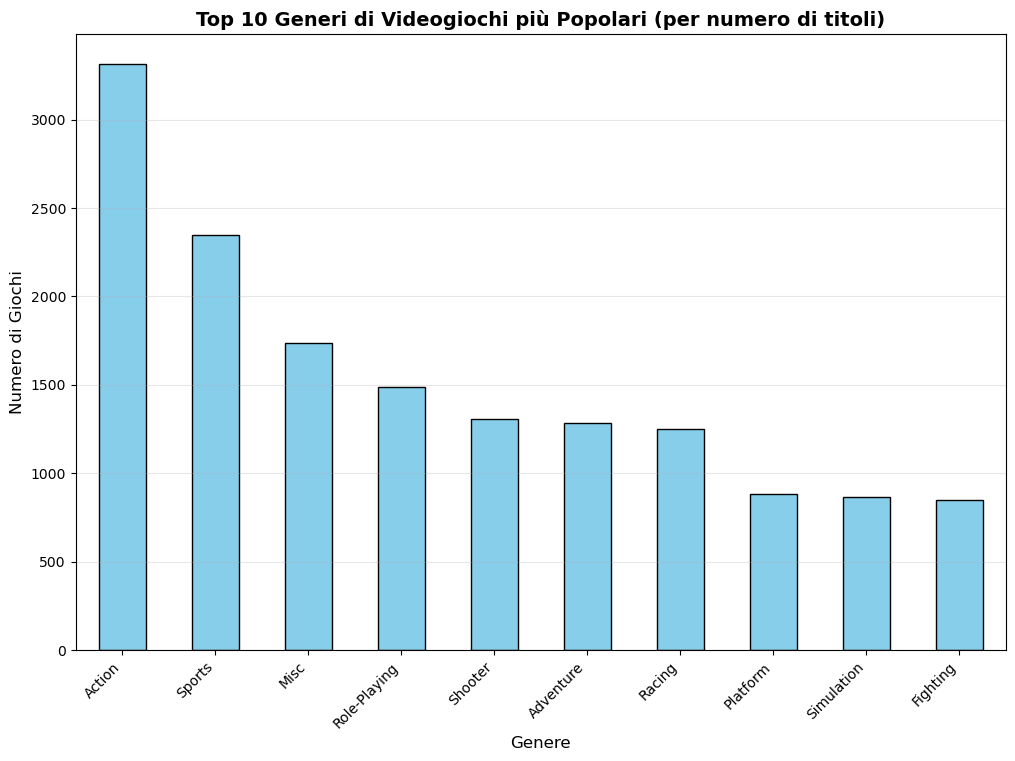

Anni coperti: 1980 - 2020
Anno con più pubblicazioni: 2009 (1431 giochi)


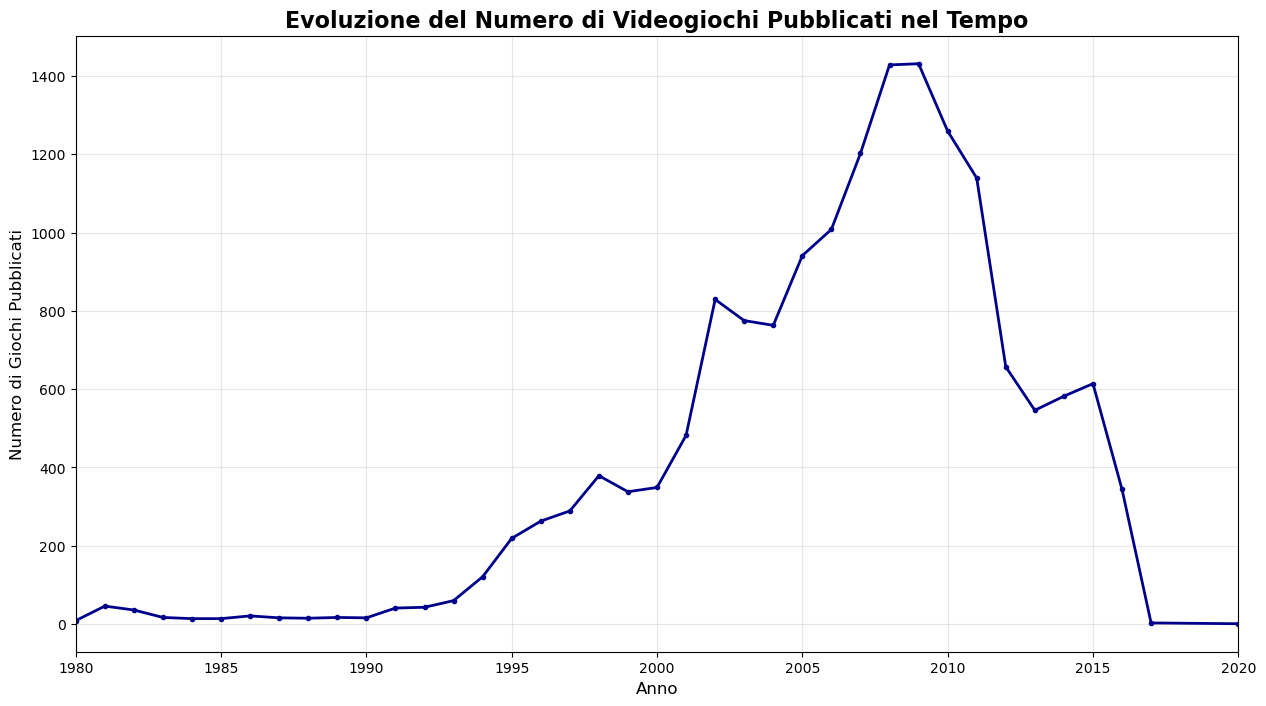

In [8]:
#1
print(f"Numero totale di videogiochi nel dataset: {len(df)}")

#2
genre_counts = df['Genre'].value_counts()
print("Top 10 generi più popolari:")
print(genre_counts.head(10))

# Creazione del bar plot
plt.figure(figsize=(12, 8))
genre_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Generi di Videogiochi più Popolari (per numero di titoli)', fontsize=14, fontweight='bold')
plt.xlabel('Genere', fontsize=12)
plt.ylabel('Numero di Giochi', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()

#3
df_time = df.dropna(subset=['Year']).copy()
games_per_year = df_time.groupby('Year').size()

print(f"Anni coperti: {int(games_per_year.index.min())} - {int(games_per_year.index.max())}")
print(f"Anno con più pubblicazioni: {int(games_per_year.idxmax())} ({games_per_year.max()} giochi)")

plt.figure(figsize=(15, 8))
plt.plot(games_per_year.index, games_per_year.values, linewidth=2, color='darkblue', marker='o', markersize=3)
plt.title('Evoluzione del Numero di Videogiochi Pubblicati nel Tempo', fontsize=16, fontweight='bold')
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Numero di Giochi Pubblicati', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(games_per_year.index.min(), games_per_year.index.max())
plt.show()
